**[2024-2] CSC4023 Deep Learning (딥러닝입문)**

Exercise 02: Gradient Methods

- Exercise using PyTorch to understand full-batch, mini-batch, and stochastic gradient descent methods

## Gradient Descent for Logistic Regression

* Goal: implement and experiment with three gradient descent methods - Full-batch GD, Stochastic GD (SGD), and Mini-batch GD - for a binary logistic regression task using a 2D dataset.

* Compare the methods in terms of:
  - training time
  - convergence speeds
  - loss behavior
  - by plotting a learning curve (loss vs iteration)

* Understand the effects of dataset size and the number of iterations on the performance of these GD methods.



### Step 1: Generate 2D dataset for logistic regression

* A synthetic dataset will be generated with two features and binary labels, following a logistic function
  - $x = [1, x_1, x_2]$
  - $\theta = [3, -2, 1]$
  - $y \in \{1,0\}$
  - model: $f_\theta(x) = \theta^\top x = 3 -2x_1 +x_2$
  - $y = \sigma(\theta^\top x) > 0.5$

* This dataset will be used to train the logistic regression models using full-batch, mini-batch, and SGD methods.


In [1]:
# import packages
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

In [2]:
# Step 1: Generate 2D Data for logistic regression

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Binary cross-entropy loss
def binary_cross_entropy(y_pred, y_true):
    eps = 1e-7  # To avoid log(0)
    y_pred = torch.clamp(y_pred, eps, 1 - eps)
    return -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()

# Data generation
def generate_data(true_theta, N):
    # true_theta: True parameters for 2D (bias + 2 features)
    train_X = np.hstack([np.ones([N, 1]), 5 * np.random.rand(N, 1), 3 * np.random.rand(N, 1)])  # Bias + 2 features
    train_Y = (1 / (1 + np.exp(-train_X @ true_theta))) > 0.5  # Binary labels
    return train_X, train_Y

# Plot data points and decision boundary
def plot_data_and_prediction(theta_hat, train_X, train_Y):
    red = np.where(train_Y == 1)[0]
    blue = np.where(train_Y == 0)[0]

    x_pred = np.linspace(0, 5, 100)
    y_pred = -(theta_hat[0] + theta_hat[1] * x_pred) / theta_hat[2]

    plt.plot(train_X[red, 1], train_X[red, 2], 'r.', alpha = 0.5, label='Class 1')
    plt.plot(train_X[blue, 1], train_X[blue, 2], 'b.', alpha = 0.5, label='Class 0')
    plt.plot(x_pred, y_pred, 'g-', linewidth=2.5, label='Prediction Line')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim([0, 5])
    plt.ylim([0, 3])
    plt.legend()
    plt.show()

Let's see example dataset generation

- generate 2000 data samples usign the function and plot the data samples

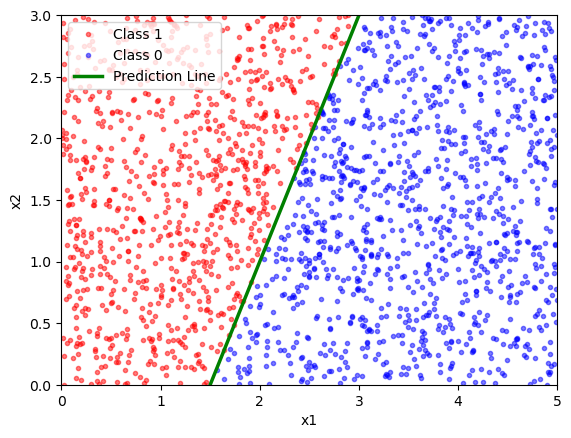

In [3]:
# Plot training data points and true line
N = 2000
true_theta = np.array([[3], [-2], [1]])
train_X, train_Y = generate_data(true_theta, N)
plot_data_and_prediction(true_theta, train_X, train_Y)

### Step 2: Implement three Gradient Descent methods

* Implement the gradient descent methods for logistic regression
* You will train models using full-batch GD, mini-batch GD, and SGD for given training dataset and training iterations
  - 하나의 함수 `train_gd`를 구현하되, 주어진 전체 데이터 `X_train`, `Y_train`을 사용해 다음과 같이 각 GD 방법을 구현합니다.
    - Full-batch: 매 iteration마다 전체 데이터를 사용해 학습을 수행
    - Mini-batch: 매 iteration마다 `batch_size` 만큼의 일부 데이터를 랜덤하게 선택해 학습을 수행
    - SGD: 매 iteration마다 1개의 데이터를 랜덤하게 선택해 학습을 수행

  - 선택된 데이터에 대해 다음을 수행
    - forward pass: 주어진 데이터에 대해 y 예측값을 계산한 후, loss를 계산

    - backward pass: loss에 대해 gradient를 계산한 후, parameter `theta`를 업데이트

* Observe and record the training time, final parameter values (`theta`) and final loss

In [4]:
# Step 2: Implement Gradient Descent Methods
def train_gd(X_train, Y_train, gradient_type="full", n_iter=1000, learning_rate=0.05, batch_size=10):
    theta = torch.zeros((3, 1), requires_grad=True)  # Initialize parameters
    loss_record = []
    start_time = time.time()

    N = X_train.shape[0]

    for i in range(n_iter):
        if gradient_type == "full":
            # Full-batch GD
            # 구현하세요: full-batch는 전체 데이터를 사용함
            X_batch = X_train.clone().detach().float()
            Y_batch = Y_train.clone().detach().float().view(-1, 1)



        elif gradient_type == "mini":
            # Mini-batch GD
            # 구현하세요: mini-batch는 주어진 batch_size를 사용해 전체 데이터 중 일부를 골라 사용함
            indices = np.random.choice(N, batch_size, replace=False)
            X_batch = X_train[indices].clone().detach().float()
            Y_batch = Y_train[indices].clone().detach().float().view(-1, 1)


        elif gradient_type == "sgd":
            # Stochastic GD
            # 구현하세요: SGD는 하나의 데이터만 랜덤으로 선택해 사용함
            index = np.random.randint(N)
            X_batch = X_train[index:index+1].clone().detach().float()
            Y_batch = Y_train[index:index+1].clone().detach().float().view(-1, 1)


        # Forward pass
        # 구현하세요: 주어진 데이터를 사용해 forward pass를 수행함
        y_pred = sigmoid(X_batch @ theta)



        # Backward pass and parameter update
        # 구현하세요: loss의 gradient 계산 후 theta 업데이트
        loss = binary_cross_entropy(y_pred, Y_batch)
        loss.backward()

        with torch.no_grad():
            theta -= learning_rate * theta.grad


        theta.grad.zero_()

        # Record loss
        loss_record.append(loss.item())

    end_time = time.time()

    theta_values = ["{:.2f}".format(val.item()) for val in theta.flatten()]
    print(f"{gradient_type.capitalize():4} GD Training Time: {end_time - start_time:.4f} seconds, Loss: {loss_record[-1]:.4f},", end=' ')
    print("Theta:", f" ".join(theta_values))

    return theta, loss_record

In [5]:
# Plot loss curves
def plot_loss_curves(loss_full, loss_sgd, loss_mini):
    plt.plot(loss_sgd, label="SGD")
    plt.plot(loss_mini, label="Mini-batch GD")
    plt.plot(loss_full, linewidth = 2.5, label="Full-batch GD")
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Curves for Different Gradient Descent Methods')
    plt.legend()
    plt.show()

# Plot data points and decision boundaries
def plot_data_and_prediction(train_X, train_Y, theta_full, theta_sgd, theta_mini):
    red = np.where(train_Y == 1)[0]
    blue = np.where(train_Y == 0)[0]

    true_theta = np.array([[3], [-2], [1]])

    x_pred = np.linspace(0, 5, 100)
    y_pred_true = -(true_theta[0] + true_theta[1] * x_pred) / true_theta[2]

    y_pred_full = -(theta_full[0] + theta_full[1] * x_pred) / theta_full[2]
    y_pred_sgd = -(theta_sgd[0] + theta_sgd[1] * x_pred) / theta_sgd[2]
    y_pred_mini = -(theta_mini[0] + theta_mini[1] * x_pred) / theta_mini[2]

    plt.plot(train_X[red, 1], train_X[red, 2], 'r.', alpha = 0.5, label='Class 1')
    plt.plot(train_X[blue, 1], train_X[blue, 2], 'b.', alpha = 0.5, label='Class 0')

    plt.plot(x_pred, y_pred_sgd, linewidth=2.5, label='SGD')
    plt.plot(x_pred, y_pred_mini, linewidth=2.5, label='Mini-batch GD')
    plt.plot(x_pred, y_pred_full, linewidth=2.5, label='Full-batch GD')
    plt.plot(x_pred, y_pred_true, 'm--', linewidth=2.5, label='True Line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim([0, 5])
    plt.ylim([0, 3])
    plt.legend()
    plt.show()

### Step 3: Compare Full-batch, SGD, and Mini-batch GD methods

* Run three gradient methods and compare results
* Plot loss curves, decision boundaries for each method and compare their convergence behavior and how well they classify the data

In [6]:
# Step 3: Compare Full-batch, SGD, and Mini-batch Gradient Descent
def compare_methods(N, n_iter, learning_rate = 0.1, batch_size = 10):
    # true theta
    true_theta = np.array([[3], [-2], [1]])

    # Generate dataset
    train_X, train_Y = generate_data(true_theta, N)
    X_train = torch.tensor(train_X, dtype=torch.float32)
    Y_train = torch.tensor(train_Y, dtype=torch.float32)

    # Full-batch Gradient Descent
    theta_full, loss_full = train_gd(X_train, Y_train, gradient_type="full", n_iter=n_iter, learning_rate=learning_rate)

    # Stochastic Gradient Descent
    theta_sgd, loss_sgd = train_gd(X_train, Y_train, gradient_type="sgd", n_iter=n_iter, learning_rate=learning_rate)

    # Mini-batch Gradient Descent
    theta_mini, loss_mini = train_gd(X_train, Y_train, gradient_type="mini", n_iter=n_iter, learning_rate=learning_rate, batch_size=batch_size)

    # Plot loss curves
    plot_loss_curves(loss_full, loss_sgd, loss_mini)

    # Plot decision boundaries
    print("\nFinal Decision Boundaries:")
    plot_data_and_prediction(train_X, train_Y, theta_full.detach().numpy(), theta_sgd.detach().numpy(), theta_mini.detach().numpy())


Let's compare the case with 2000 data samples, 500 iterations, 0.1 learning rate, batch size 100.

- 다음과 같은 결과가 나와야 합니다:

  ```
  Full GD Training Time: 0.3549 seconds, Loss: 0.1552, Theta: 2.24 -2.33 1.76
  Sgd  GD Training Time: 0.4175 seconds, Loss: 0.0754, Theta: 2.54 -2.36 1.51
  Mini GD Training Time: 0.4603 seconds, Loss: 0.1313, Theta: 2.26 -2.31 1.78
  ```

======

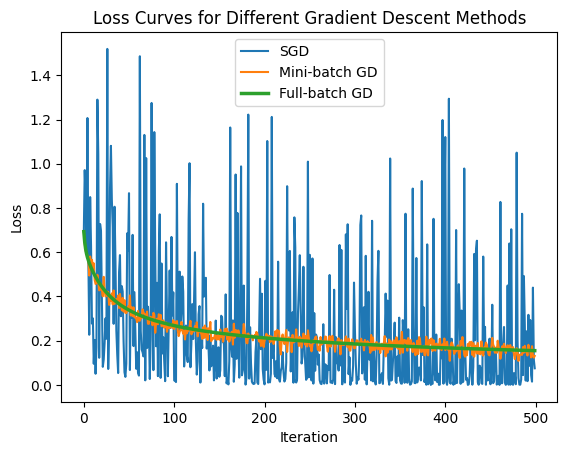



=======================

Final Decision Boundaries:

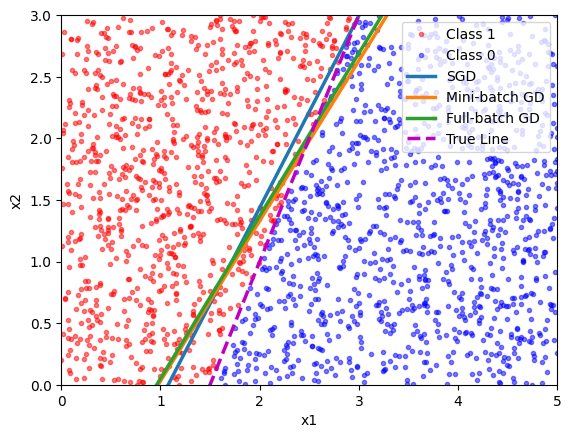

Full GD Training Time: 0.1120 seconds, Loss: 0.1531, Theta: 2.34 -2.31 1.67
Sgd  GD Training Time: 0.0627 seconds, Loss: 0.0723, Theta: 2.40 -2.51 1.50
Mini GD Training Time: 0.0812 seconds, Loss: 0.1236, Theta: 2.34 -2.31 1.66


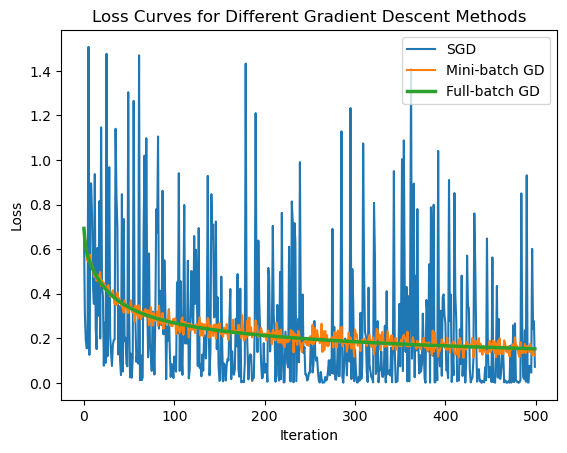


Final Decision Boundaries:


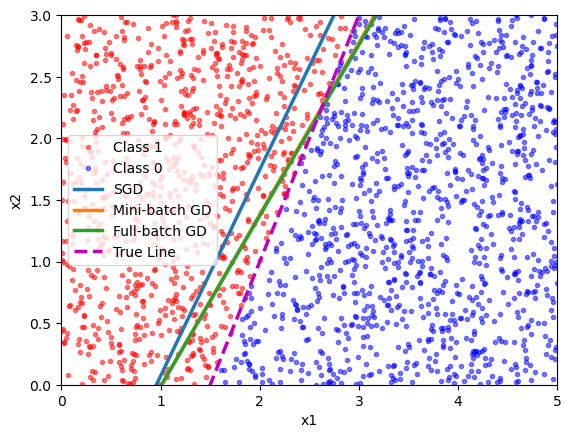

In [7]:
# 구현하세요:
compare_methods(2000,500,0.1,100)



### Step 4: Compare and Analyze

* Compare the methods in terms of
  - training time (실제로 학습에 걸리는 시간)
  - convergence speed (수렴 경향)
  - dataset size (학습 데이터 숫자에 따른 경향)

  - 위의 factor들에 따른 각 방법의 성능에 대한 분석을 실험결과를 활용해 작성하세요.
  - pdf 2장 이내 분량으로 제출 (실험 결과 이미지를 자유롭게 추가해도 됨)
  

Full GD Training Time: 0.0820 seconds, Loss: 0.1531, Theta: 2.28 -2.35 1.74
Sgd  GD Training Time: 0.0650 seconds, Loss: 0.0144, Theta: 2.28 -2.43 1.90
Mini GD Training Time: 0.0851 seconds, Loss: 0.0996, Theta: 2.30 -2.35 1.73


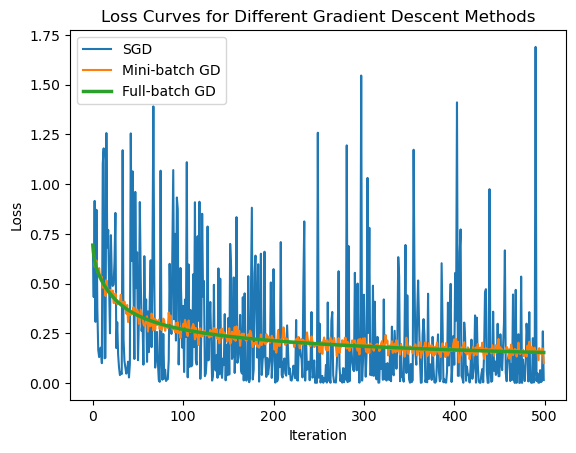


Final Decision Boundaries:


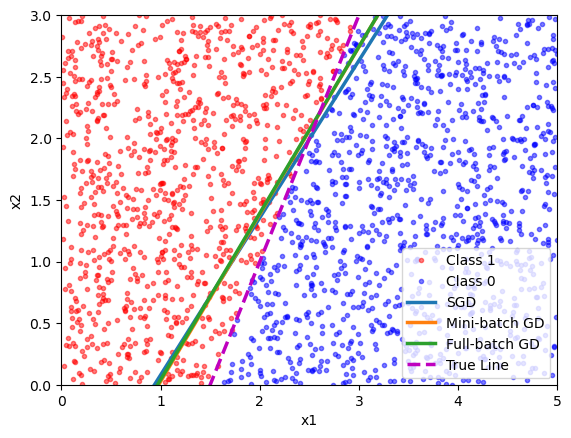

In [8]:
# 구현하세요:
compare_methods(2000,500,0.1,100)

Full GD Training Time: 0.1815 seconds, Loss: 0.1608, Theta: 2.27 -2.33 1.74
Sgd  GD Training Time: 0.0628 seconds, Loss: 0.0177, Theta: 2.14 -2.51 1.95
Mini GD Training Time: 0.0940 seconds, Loss: 0.1274, Theta: 2.27 -2.32 1.74


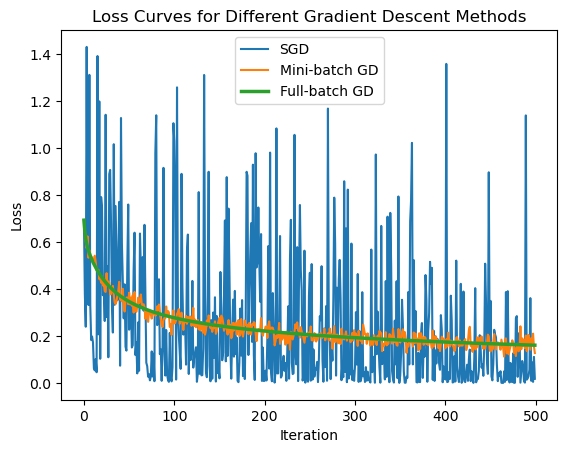


Final Decision Boundaries:


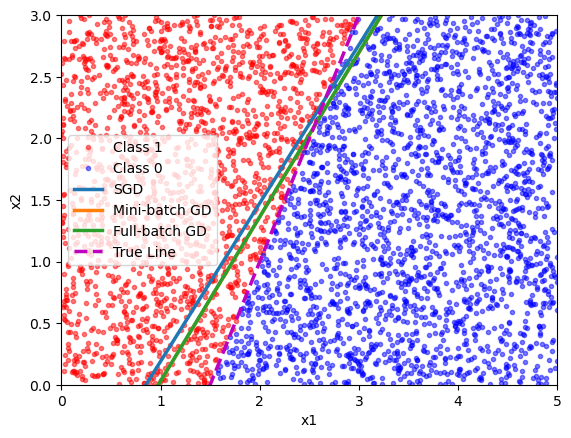

In [9]:
# 구현하세요:
compare_methods(4000,500,0.1,100)

Full GD Training Time: 0.2229 seconds, Loss: 0.1591, Theta: 2.25 -2.33 1.75
Sgd  GD Training Time: 0.0620 seconds, Loss: 0.0136, Theta: 2.33 -2.33 2.05
Mini GD Training Time: 0.1138 seconds, Loss: 0.1692, Theta: 2.27 -2.31 1.74


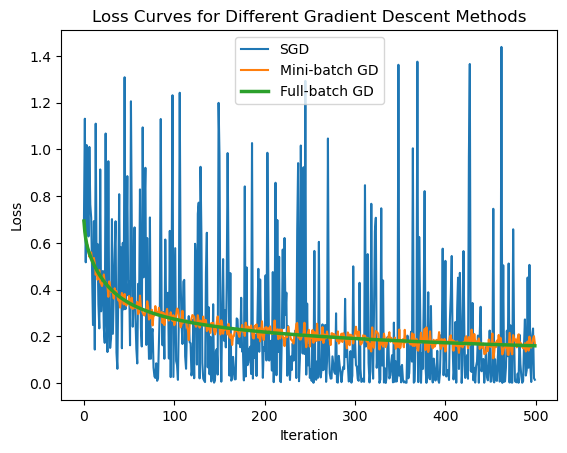


Final Decision Boundaries:


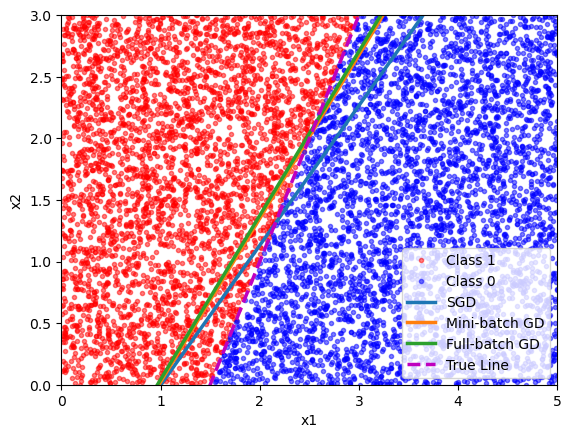

In [10]:
# 구현하세요:
compare_methods(8000,500,0.1,100)

Full GD Training Time: 0.3098 seconds, Loss: 0.1565, Theta: 2.29 -2.33 1.74
Sgd  GD Training Time: 0.0619 seconds, Loss: 0.0002, Theta: 2.37 -2.35 1.79
Mini GD Training Time: 0.1555 seconds, Loss: 0.1715, Theta: 2.25 -2.34 1.75


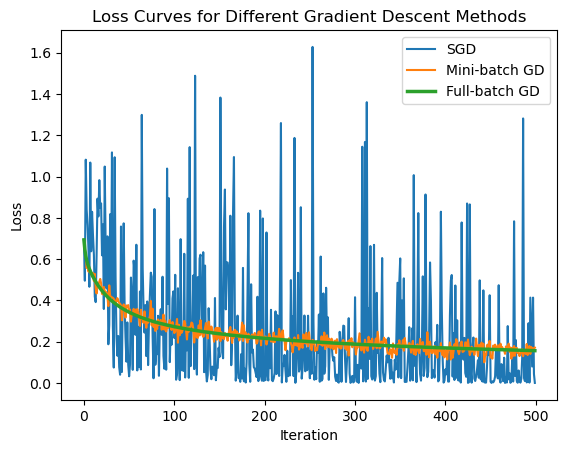


Final Decision Boundaries:


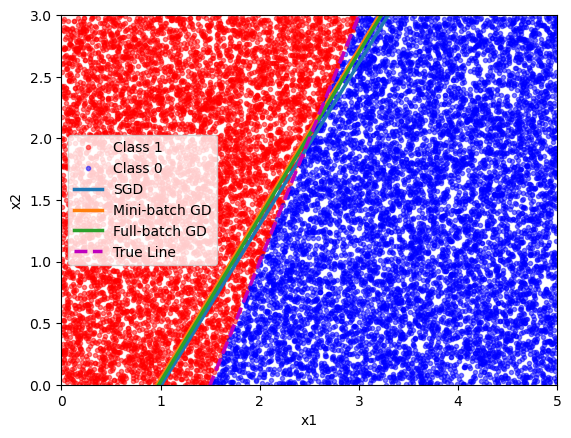

In [11]:
# 구현하세요:
compare_methods(16000,500,0.1,100)

Full GD Training Time: 0.3820 seconds, Loss: 0.1557, Theta: 2.29 -2.34 1.74
Sgd  GD Training Time: 0.0623 seconds, Loss: 0.0069, Theta: 2.27 -2.58 1.81
Mini GD Training Time: 0.2655 seconds, Loss: 0.1378, Theta: 2.28 -2.35 1.75


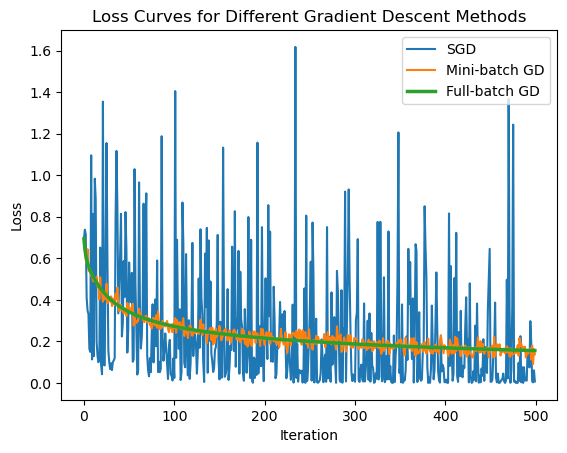


Final Decision Boundaries:


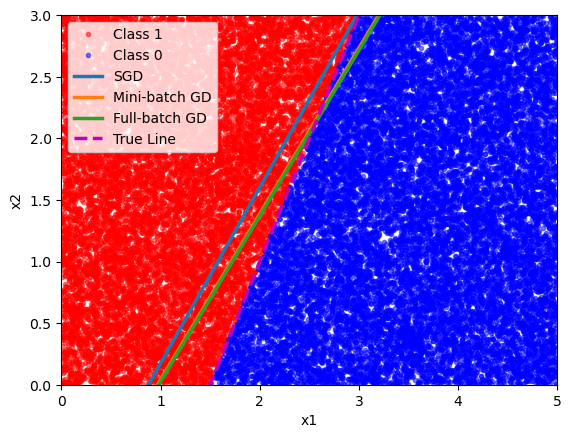

In [12]:
# 구현하세요:
compare_methods(32000,500,0.1,100)

Full GD Training Time: 1.1432 seconds, Loss: 0.1555, Theta: 2.28 -2.33 1.74
Sgd  GD Training Time: 0.0624 seconds, Loss: 0.2466, Theta: 2.39 -2.38 2.01
Mini GD Training Time: 0.4141 seconds, Loss: 0.1722, Theta: 2.29 -2.33 1.74


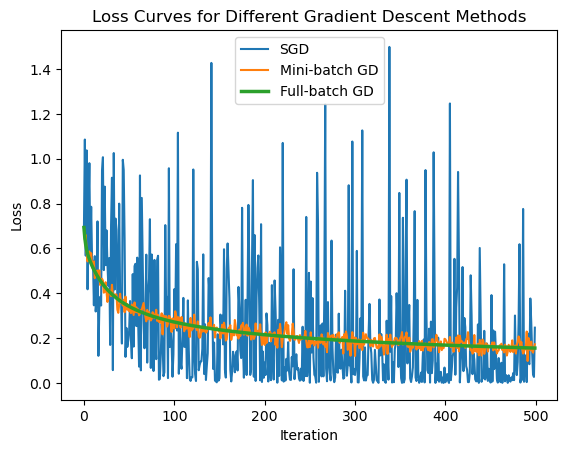


Final Decision Boundaries:


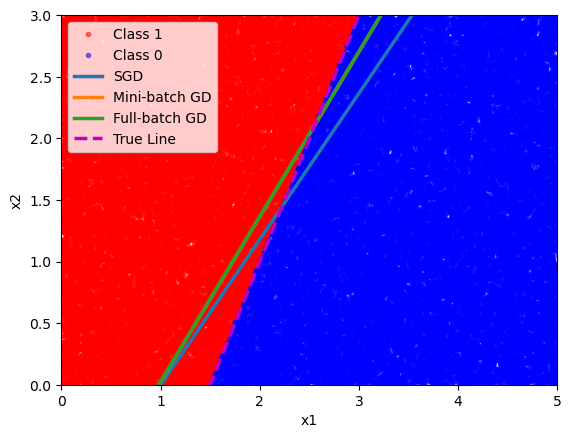

In [13]:
# 구현하세요:
compare_methods(64000,500,0.1,100)

Full GD Training Time: 1.3653 seconds, Loss: 0.1559, Theta: 2.27 -2.34 1.75
Sgd  GD Training Time: 0.0608 seconds, Loss: 0.2147, Theta: 2.48 -2.52 1.64
Mini GD Training Time: 0.7483 seconds, Loss: 0.1647, Theta: 2.29 -2.32 1.76


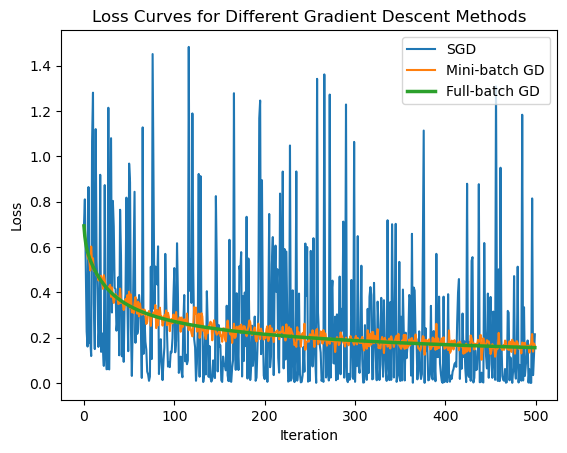


Final Decision Boundaries:


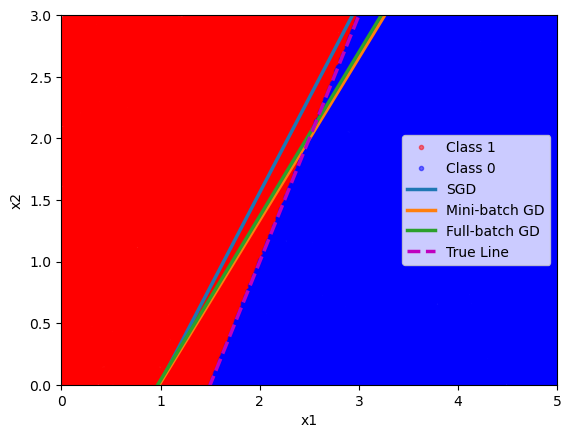

In [14]:
# 구현하세요:
compare_methods(128000,500,0.1,100)

Full GD Training Time: 1.9656 seconds, Loss: 0.1557, Theta: 2.27 -2.34 1.75
Sgd  GD Training Time: 0.0617 seconds, Loss: 0.1299, Theta: 2.28 -2.24 2.07
Mini GD Training Time: 1.5186 seconds, Loss: 0.1464, Theta: 2.28 -2.34 1.74


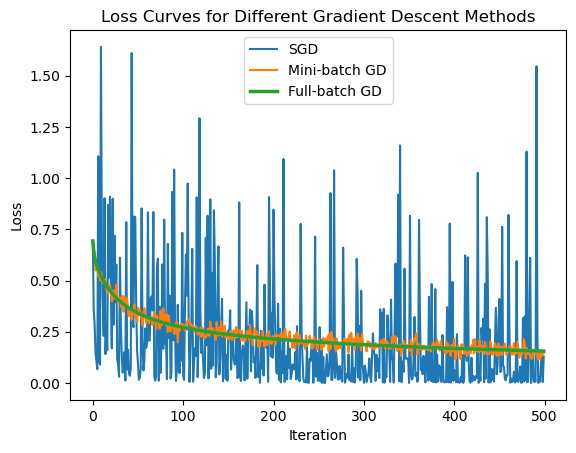


Final Decision Boundaries:


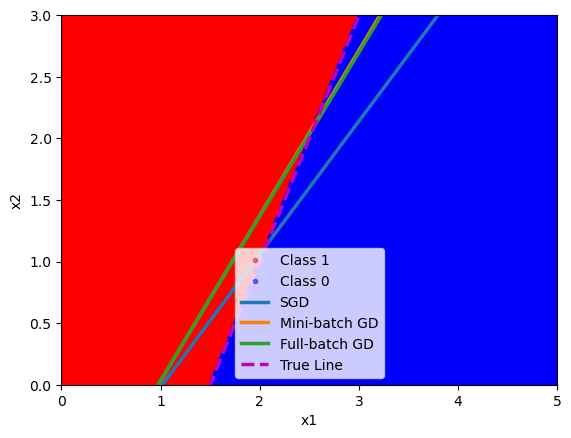

In [15]:
# 구현하세요:
compare_methods(256000,500,0.1,100)

Full GD Training Time: 3.5364 seconds, Loss: 0.1560, Theta: 2.27 -2.33 1.76
Sgd  GD Training Time: 0.0612 seconds, Loss: 0.4475, Theta: 2.44 -2.41 1.65
Mini GD Training Time: 3.0320 seconds, Loss: 0.1644, Theta: 2.28 -2.34 1.74


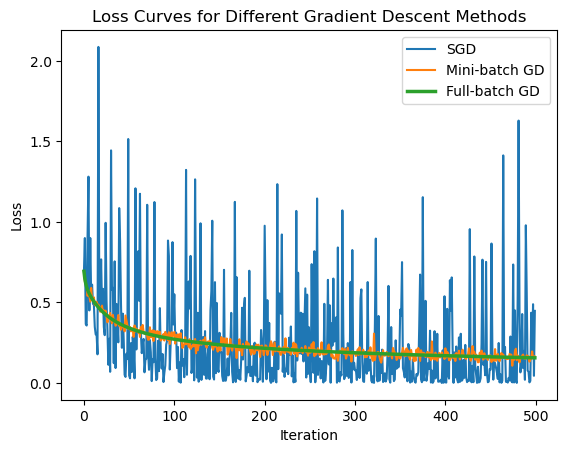


Final Decision Boundaries:


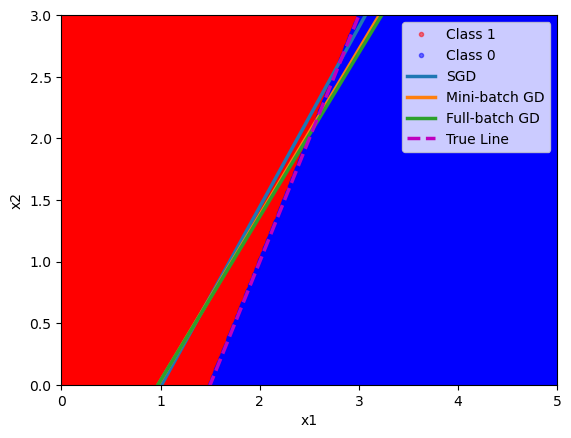

In [16]:
# 구현하세요:
compare_methods(512000,500,0.1,100)

Full GD Training Time: 6.2485 seconds, Loss: 0.1557, Theta: 2.27 -2.34 1.76
Sgd  GD Training Time: 0.0615 seconds, Loss: 0.2938, Theta: 2.33 -2.45 1.64
Mini GD Training Time: 6.0619 seconds, Loss: 0.1513, Theta: 2.24 -2.33 1.78


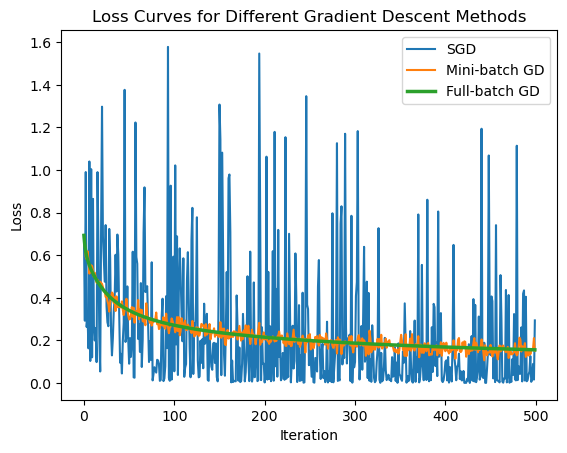


Final Decision Boundaries:


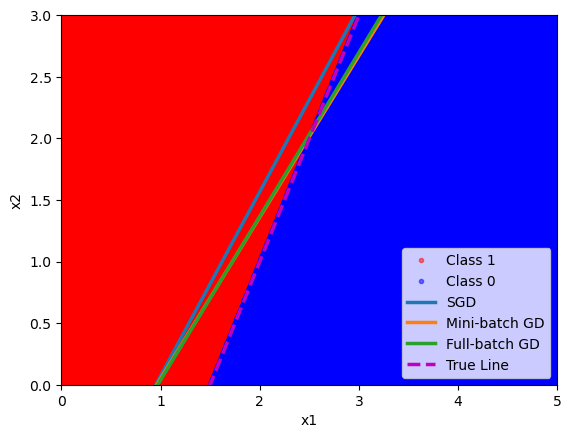

In [17]:
# 구현하세요:
compare_methods(1024000,500,0.1,100)